<h1 style="color:red"> Objective: With some features classify if the car is going to be sold or not </h1>
<h2 style="color:red"> *Dataset from Guilherme Silveira - Alura's teacher </h2>

# 1. Getting the Data

In [43]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


# 2. Treating the Data

## Modify the values in 'sold' column

In [44]:
to_change = {
    'no' : 0,
    'yes' : 1
}

data.sold = data.sold.map(to_change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


## Create the column 'model_age'

In [45]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


## Drop some columns

In [46]:
data = data.drop(columns = ['Unnamed: 0', 'model_year'], axis = 1)
data.head()

,mileage_per_year,price,sold,model_age
0,21801,30941.02,1,20
1,7843,40557.96,1,22
2,7109,89627.50,0,14
3,26823,95276.14,0,5
4,7935,117384.68,1,6


# 3. Analysing the Data

## Missing values

In [48]:
missing_values_count = data.isnull().sum()
missing_values_count

mileage_per_year    0
price               0
sold                0
model_age           0
dtype: int64

## Data type frequency

In [22]:
data.dtypes.value_counts()

int64      3
float64    1
dtype: int64

## Visualize the data

<AxesSubplot:xlabel='price', ylabel='model_age'>

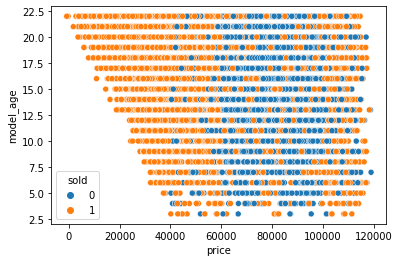

In [35]:
import seaborn as sns

sns.scatterplot(x = "price", y = "model_age", data = data, hue = "sold")

<AxesSubplot:xlabel='price', ylabel='mileage_per_year'>

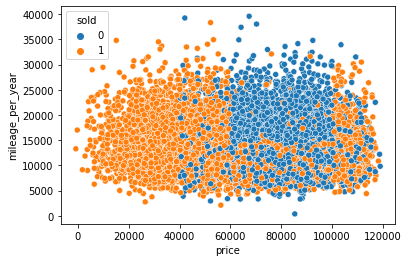

In [32]:
sns.scatterplot(x = "price", y = "mileage_per_year", hue = "sold",data = data)

<AxesSubplot:xlabel='model_age', ylabel='mileage_per_year'>

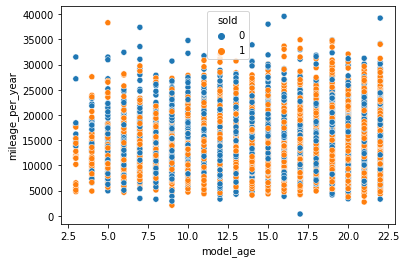

In [30]:
sns.scatterplot(x = "model_age", y = "mileage_per_year", hue = "sold", data = data)

# 4. Building some models

## Create Linear SVC Model and calculate the accuracy

In [5]:
# import some libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# get the features and target variables
x = data[["price", "model_age", "mileage_per_year"]]
y = data["sold"]

# random variable
SEED = 5
np.random.seed(SEED)

# split the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("We'll train with %d elements and we'll test with %d elements" % (len(train_x) , len(test_x)))

# create the model and predict
model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

# verify the model accuracy
accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is %.2f%%" % accuracy)

We'll train with 7500 elements and we'll test with 2500 elements
The accuracy is 58.00%


C:\Users\rafaa\anaconda3\envs\Thinkseg\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Create Dummy Classifiers and calculate the accuracy

### Dummy Stratified

In [6]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier(strategy = "stratified")
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100

print("The dummy stratified accuracy is %.2f%%" % accuracy)

The dummy stratified accuracy is 52.44%


### Dummy most Frquent

In [7]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier(strategy = "most_frequent")
dummy_mostfrequent.fit(train_x, train_y)
accuracy = dummy_mostfrequent.score(test_x, test_y) * 100

print("The dummy most frequent accuracy is %.2f%%" % accuracy)

The dummy most frequent accuracy is 58.00%


## Create a SVC Model using Standard Scaler and calculate the accuracy

In [8]:
# Import some libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# random variable
SEED = 5
np.random.seed(SEED)

# split the data into train and test 
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                           stratify = y)
print("We'll train with %d elements and we'll test with %d elements" % (len(raw_train_x), 
                                                                        len(raw_test_x)))

# Scale the data
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# Create the model
model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

# Calculate the accuracy
accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is %.2f%%" % accuracy)

We'll train with 7500 elements and we'll test with 2500 elements
The accuracy is 77.48%


## Create a Decision Tree model and calculate the accuracy

In [9]:
# Import some libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# random variable
SEED = 5
np.random.seed(SEED)

# split the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print("We'll train with %d elements and we'll test with %d elements" % (len(train_x) , len(test_x)))


model = DecisionTreeClassifier(max_depth=3)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy is %.2f%%" % accuracy)

We'll train with 7500 elements and we'll test with 2500 elements
The accuracy is 79.28%


### Plot the Decision Tree

<h3 style="color:red">IF YOU HAVE THE ERROR:ExecutableNotFound: failed to execute ['dot.bat', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH </h3>

<p>
<h4> (IN CMD): <br/>
>> conda activate "ENV" <br/>
>> pip install graphviz  
</h4>
</p>

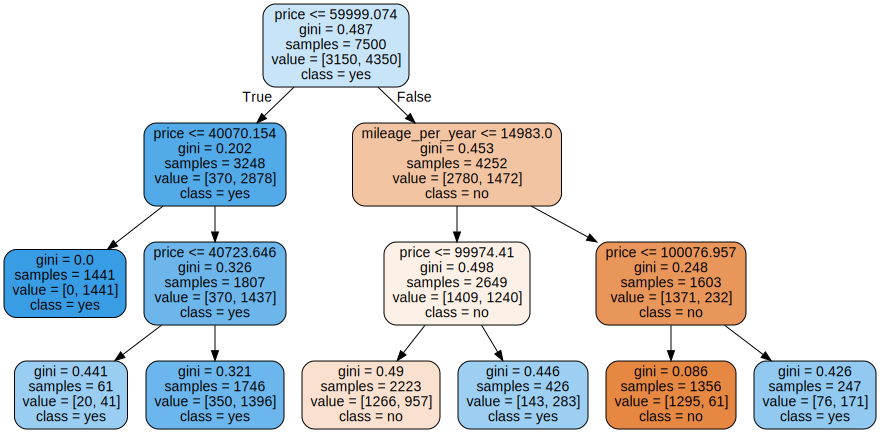

In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/rafaa/anaconda3/envs/Thinkseg/Library/bin/graphviz/'

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["no", "yes"])
graph = graphviz.Source(dot_data)
graph